In [138]:
from tensorflow.keras.datasets import fashion_mnist #https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist
from keras.models import Sequential  #https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout, Activation, Flatten #слои
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
import pandas as pd



In [139]:
#загружаем датасет
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [140]:
print('размерность обучающей выборки:', X_train.shape)
print('выборка:', y_train)

размерность обучающей выборки: (60000, 28, 28)
выборка: [9 0 0 ... 3 0 5]


Это набор данных из 60 000 изображений в оттенках серого (интенсивностью от 0 до 255) 28x28 из 10 категорий моды, а также тестовый набор из 10 000 изображений. Этот набор данных можно использовать в качестве замены MNIST. Метки классов таковы:
> Этикетка	Описание
> * 0	Футболка / топ
* 1	Брюки
* 2	Пуловеры (свитеры)
* 3	Платье
* 4	Пальто
* 5	Сандали (туфли)
* 6	Рубашка
* 7	Кроссовоки
* 8	Сумка
* 9	Ботильон на лодыжке(ботинки)


размерность одного объекта:  (28, 28)


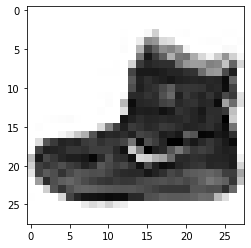

In [141]:
print('размерность одного объекта: ',X_train[0].shape)
#выведем изображение
from matplotlib import pyplot as plt
plt.imshow(X_train[0]
           , cmap='Greys'
           )

Проверим обучающую выборку

In [142]:
from collections import Counter
print(Counter(y_train))
X_train.shape

Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})


(60000, 28, 28)

Каждый из классов встречается по 6000 раз, следовательно выборка сбалансирована

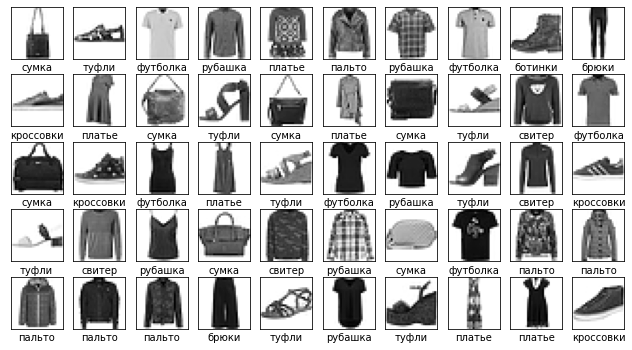

In [143]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']
plt.figure(figsize=(11,6))
for i in range(200,250):
    plt.subplot(5,10,i-200+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

##Предобработка

###Изменение размерности изображений X

In [144]:
#преобразование входных данных (размерности изображений) для Keras

X_train = X_train.reshape(X_train.shape[0], X_train.shape[2] * X_train.shape[1])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_test.shape)


(60000, 784)
(10000, 784)


###Нормализация X

Как как значения интенсивность каждого пиксела варьируется от 0 до 255, переходим к данным от 0 до 1, чтобы алгоритму оптимизации нейронной сети во время обучения было удобнее

In [145]:
X_train = X_train / 255
X_test = X_test / 255

In [146]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Преобразуем правильные ответы выборок для работы с нейронной сетью

In [147]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [148]:
# Преобразуем метки в категории (а формат one hot encoding)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [149]:
print('размерность y_train: ', y_train.shape)
print('первый элемент y_train:', y_train[0])
print('размерность y_test: ', y_test.shape)
print('первый элемент y_test:', y_test[0])

размерность y_train:  (60000, 10)
первый элемент y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
размерность y_test:  (10000, 10)
первый элемент y_test: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Построение нейронной сети

In [150]:
# Создаем последовательную модель
model = Sequential()

In [151]:
model.add(Dense(600, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [152]:
model.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=["accuracy"])

In [153]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                6010      
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________
None


### Обучение модели

In [154]:
mf = model.fit(X_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 3s 12ms/step - loss: 1.5447 - accuracy: 0.5309 - val_loss: 0.8484 - val_accuracy: 0.7375
Epoch 2/100
240/240 [==============================] - 3s 11ms/step - loss: 0.8053 - accuracy: 0.7507 - val_loss: 0.7018 - val_accuracy: 0.7768
Epoch 3/100
240/240 [==============================] - 3s 11ms/step - loss: 0.6810 - accuracy: 0.7877 - val_loss: 0.6343 - val_accuracy: 0.7948
Epoch 4/100
240/240 [==============================] - 3s 11ms/step - loss: 0.6278 - accuracy: 0.7998 - val_loss: 0.5958 - val_accuracy: 0.8037
Epoch 5/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5857 - accuracy: 0.8130 - val_loss: 0.5663 - val_accuracy: 0.8127
Epoch 6/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5620 - accuracy: 0.8180 - val_loss: 0.5476 - val_accuracy: 0.8163
Epoch 7/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5418 - accuracy: 0.8223 - val_loss: 0.5294 - val_accuracy:

Проверяем качетво работы на тестовых данных


In [155]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('доля верных ответов в %:',scores[1]*100, '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8653
доля верных ответов в %: 86.52999997138977 %


#### Используем нейронную сеть для распознавания

In [156]:
X_test.shape

(10000, 784)

In [157]:
n = 5984

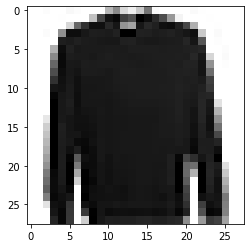

In [158]:
plt.imshow(X_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [159]:
x = X_test[n]
x = np.expand_dims(x, axis=0)

In [160]:
x.shape

(1, 784)

In [161]:
prediction = model.predict(x)

In [162]:
prediction

array([[6.16209523e-04, 3.16466103e-05, 8.11174572e-01, 6.69577450e-04,
        8.51416737e-02, 2.45054848e-14, 1.00894794e-01, 9.09780877e-14,
        1.47149921e-03, 5.56652077e-12]], dtype=float32)

In [163]:
y_test[n]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)